<a href="https://colab.research.google.com/github/yasinazhdari/CallBacks_Utilization/blob/main/Finding_Best_Learning_Rate_on_Hoda_Dataset_Keras_Yasin_Azhdari_Colab_1_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Downloading the Dataset and corresponding utilization code, along with
# learningratefinder with the following line of commands.
!wget https://raw.githubusercontent.com/Alireza-Akhavan/tf2-tutorial/master/callbacks/learningratefinder.py
!wget https://raw.githubusercontent.com/Alireza-Akhavan/SRU-deeplearning-workshop/master/dataset.py
!mkdir dataset
!wget https://github.com/Alireza-Akhavan/SRU-deeplearning-workshop/raw/master/dataset/Data_hoda_full.mat -P dataset

--2022-06-28 05:17:34--  https://raw.githubusercontent.com/Alireza-Akhavan/tf2-tutorial/master/callbacks/learningratefinder.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5439 (5.3K) [text/plain]
Saving to: ‘learningratefinder.py’

learningratefinder. 100%[===================>]   5.31K  --.-KB/s    in 0s      

2022-06-28 05:17:34 (59.3 MB/s) - ‘learningratefinder.py’ saved [5439/5439]

--2022-06-28 05:17:34--  https://raw.githubusercontent.com/Alireza-Akhavan/SRU-deeplearning-workshop/master/dataset.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting re

In [ ]:
from learningratefinder import LearningRateFinder

Epoch 1/19


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


110/110 [==============================] - 12s 6ms/step - loss: 2.3008 - accuracy: 0.1049
Epoch 2/19
110/110 [==============================] - 0s 4ms/step - loss: 2.2953 - accuracy: 0.1080
Epoch 3/19
110/110 [==============================] - 0s 4ms/step - loss: 2.3003 - accuracy: 0.1034
Epoch 4/19
110/110 [==============================] - 0s 4ms/step - loss: 2.3002 - accuracy: 0.1009
Epoch 5/19
110/110 [==============================] - 0s 4ms/step - loss: 2.2982 - accuracy: 0.1026
Epoch 6/19
110/110 [==============================] - 0s 4ms/step - loss: 2.2983 - accuracy: 0.1083
Epoch 7/19
110/110 [==============================] - 0s 5ms/step - loss: 2.2967 - accuracy: 0.1123
Epoch 8/19
110/110 [==============================] - 0s 4ms/step - loss: 2.2955 - accuracy: 0.1123
Epoch 9/19
110/110 [==============================] - 0s 4ms/step - loss: 2.2945 - accuracy: 0.1126
Epoch 10/19
110/110 [==============================] - 0s 4ms/step - loss: 2.2944 - accuracy: 0.1071
Epoch 11/

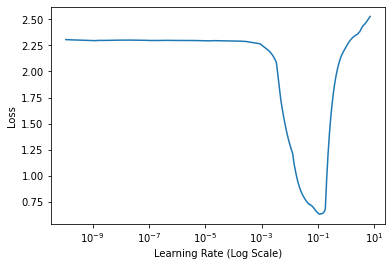

In [ ]:
# Import libraries                       and modules
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
import numpy as np
from dataset import load_hoda
import matplotlib.pyplot as plt


np.random.seed(123)              # for reproducibility

# Load pre-shuffled HODA data into train and test sets
x_train_original, y_train_original, x_test_original, y_test_original = load_hoda(
                                                                        training_sample_size   =3500,
                                                                        test_sample_size=400,size=28)

# Preprocess input data

x_train = np.array(x_train_original)
x_test  = np.array( x_test_original)

x_train = x_train.astype('float32')
x_test   = x_test.astype('float32')
x_train /= 255
x_test  /= 255

# Reshape to original image shape (n x 784)  ==> (n x 28 x 28 x 1)
x_train = x_train.reshape(-1,28,28,1)
x_test  =  x_test.reshape(-1,28,28,1)


#  Preprocess class labels
y_train = keras.utils.to_categorical(y_train_original, num_classes=10)
y_test  = keras.utils.to_categorical(y_test_original , num_classes=10)


# test and validation set
x_val  = x_test[:200]
x_test = x_test[200:]
y_val  = y_test[:200]
y_test = y_test[200:]

# Define model architecture
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

MIN_LR = 1e-10
opt = keras.optimizers.SGD(lr=MIN_LR, momentum=0.9)

#  Compile model
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

# initialize the learning rate finder and then train with learning
# rates ranging from 1e-10 to 1e+1
lrf = LearningRateFinder(model)
lrf.find((x_train, y_train),1e-10, 1e+1)
# plot the loss for the various learning rates and save the resulting plot to disk
lrf.plot_loss()

In [ ]:
np.min(lrf.losses)

0.6321045476502113